Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Load Insurance Dataset

In [2]:
df = pd.read_csv('insurance.csv')

EDA

In [3]:
# Display first of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Display last of data
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# Number of rows and columns
df.shape

(1338, 7)

In [6]:
# List the types of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Statistical Summary
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [9]:
df.dtypes[df.dtypes == 'object'].index

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
# Check Missing Data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Drop Duplicate Data
# only one duplicate row 1338 -> 1337
df.shape
df = df.drop_duplicates()

In [12]:
df.shape

(1337, 7)

Univariate Analysis

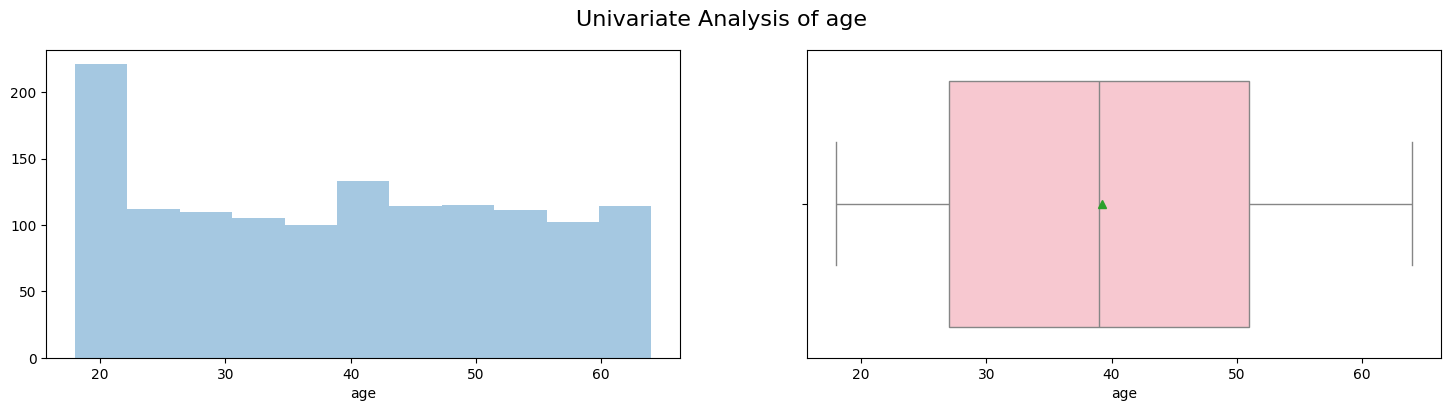

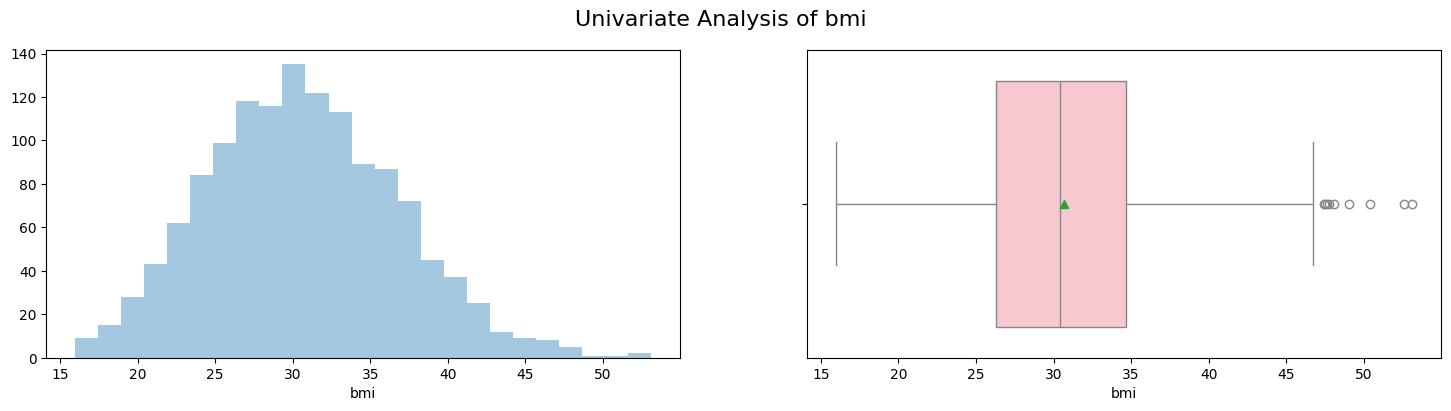

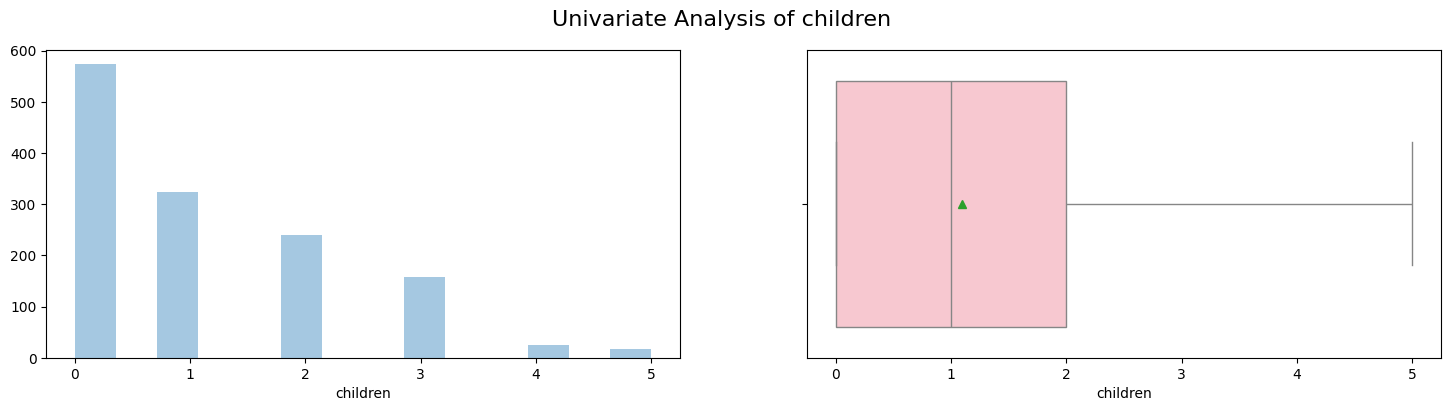

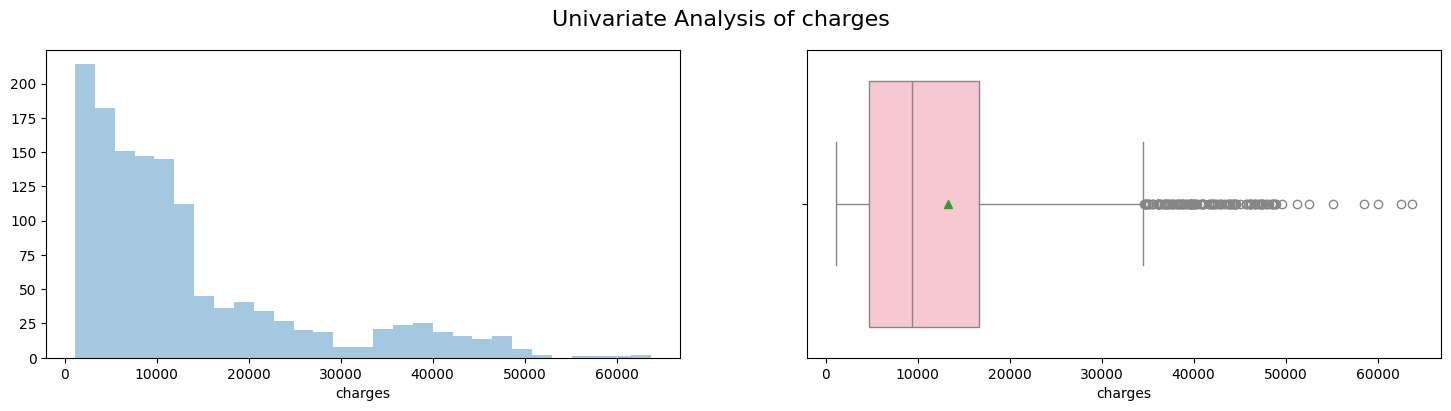

In [13]:
x_axis = ["age", "bmi", "children", "charges"]
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(df[x], ax=axes[0], kde = False)
    sns.boxplot(df[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

In [14]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Bivariate Analysis

In [15]:
# Display total sex
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='charges'>

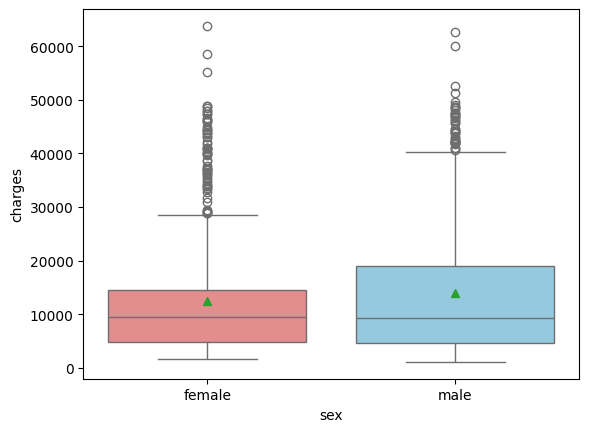

In [16]:
sns.boxplot(x="sex", y="charges", data=df, showmeans=True, palette={"female": "lightcoral", "male": "skyblue"})

<Axes: xlabel='sex', ylabel='charges'>

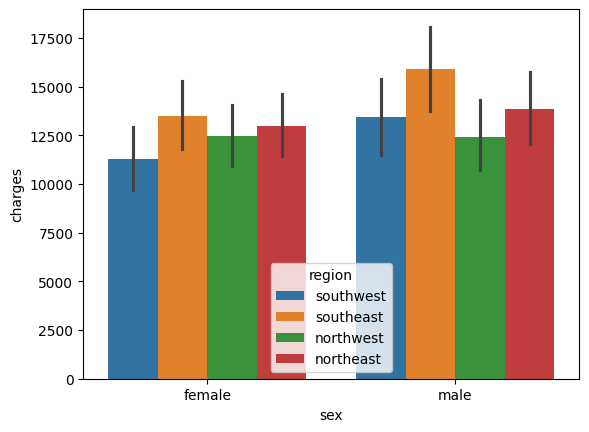

In [17]:
sns.barplot(x = "sex", y = "charges",hue='region', data = df)

<Axes: xlabel='children', ylabel='charges'>

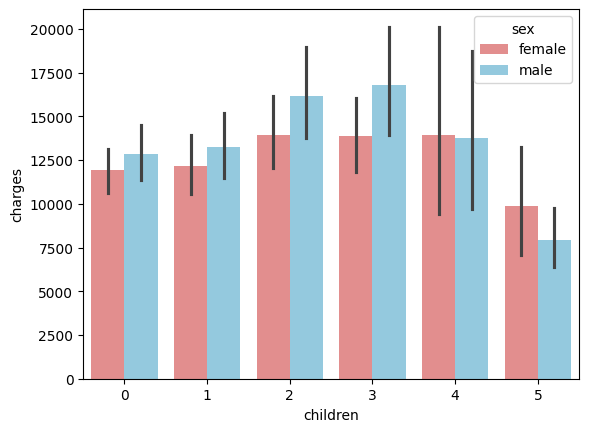

In [18]:
sns.barplot(x = "children", y = "charges",hue='sex', data = df, palette={"female": "lightcoral", "male": "skyblue"})

In [19]:
# Display Total Smoker
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='charges'>

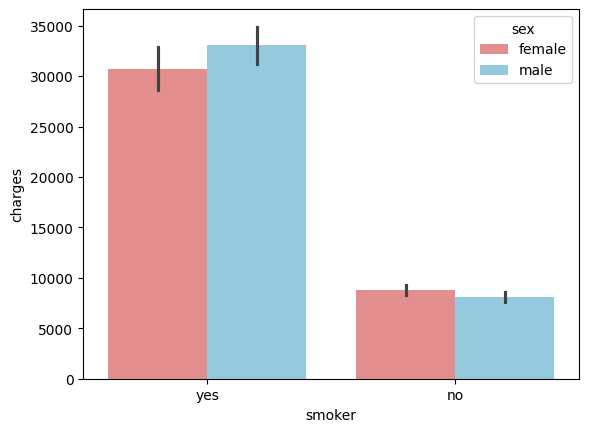

In [20]:
sns.barplot(x = 'smoker',y = 'charges', hue = 'sex', data = df, palette={"female": "lightcoral", "male": "skyblue"})

# As we can see here charges for smokers are greater than that of non smokers for both the genders.

<Axes: xlabel='smoker', ylabel='charges'>

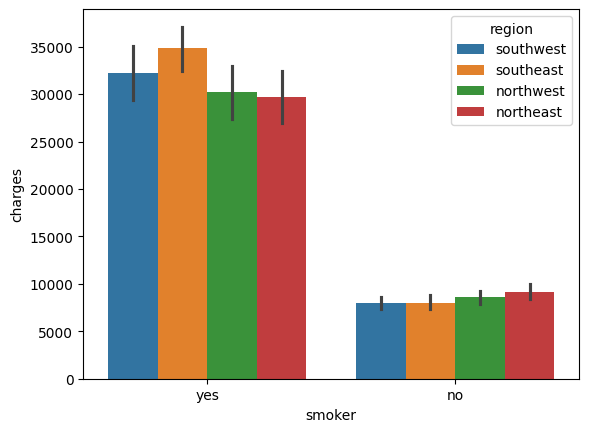

In [21]:
sns.barplot(x = 'smoker', y = 'charges',hue = 'region', data = df)

<Axes: xlabel='smoker', ylabel='charges'>

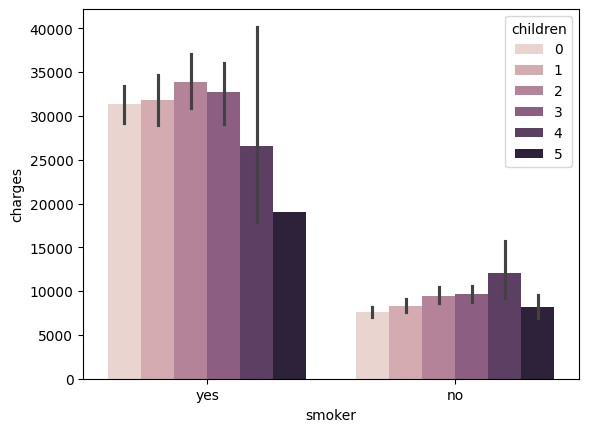

In [22]:
sns.barplot(x='smoker',y='charges',hue='children',data=df)

In [23]:
# Display Total Region
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='charges'>

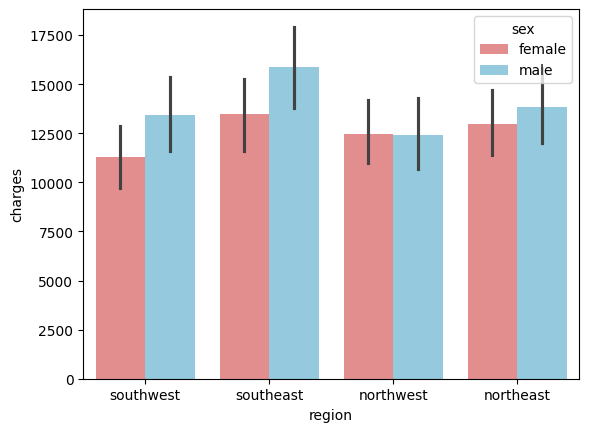

In [24]:
sns.barplot(x='region',y='charges',hue='sex',data=df, palette={"female": "lightcoral", "male": "skyblue"})

Scatter Plot

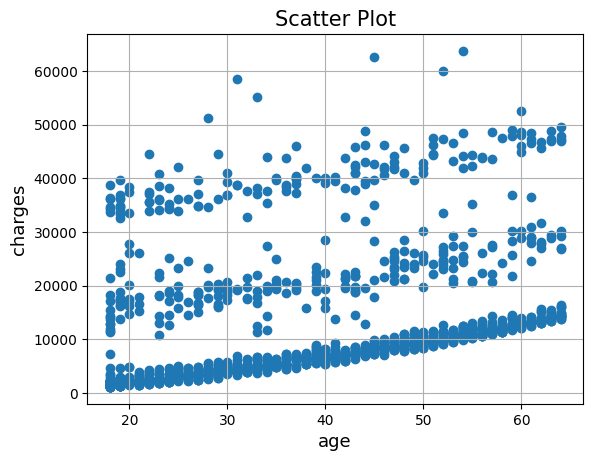

In [25]:
# Age vs Chargers Scatterplot
plt.scatter(df["age"], df["charges"])
plt.xlabel("age", fontsize = 13)
plt.ylabel("charges", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

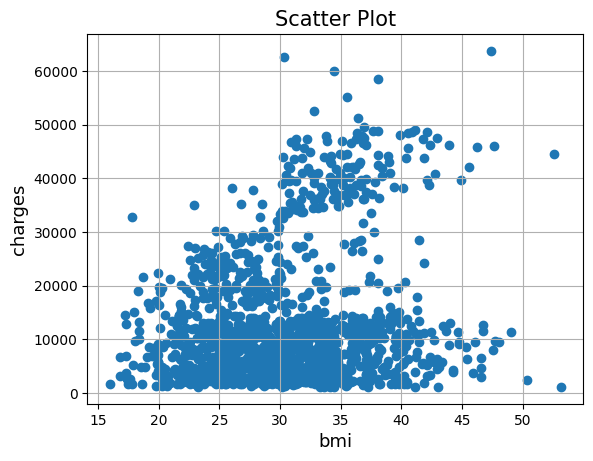

In [26]:
# BMI vs Charges Scatterplot
plt.scatter(df["bmi"], df["charges"])
plt.xlabel("bmi", fontsize = 13)
plt.ylabel("charges", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

Correlation Using Heatmap -> yg udh ada aja

Handling Categorical Features

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
# Handling categorical feature sex
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [29]:
df['sex']=df['sex'].map({'female':0,'male':1})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [30]:
# Handling categorical feature smoker
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [31]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [32]:
# Handling categorical feature region
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [33]:
df['region']=df['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


Split the Data into X and y

In [34]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [35]:
X = df.drop(['charges'],axis=1)

In [36]:
y = df['charges']

Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Model Building

# 1. Using Linear Regression

In [39]:
# Model Linear Regression
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

In [41]:
# Evaluating the Algorithm
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred1)
print(score1)

0.8068466322629113


In [42]:
# Evaluating metrics
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 4182.353155288296
MSE: 35493102.6116505
RMSE: 5957.608799816458


In [44]:
df_1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred1,'Variance':y_test-y_pred1})
df_1.head()

,Actual,Predicted,Variance
900,8688.85885,8080.450186,608.408664
1064,5708.86700,5592.871120,115.995880
1256,11436.73815,14378.298655,-2941.560505
298,38746.35510,31731.819541,7014.535559
237,4463.20510,9158.356944,-4695.151844


Text(0.5, 0.98, 'Actual vs Predicted with Linear Regression')

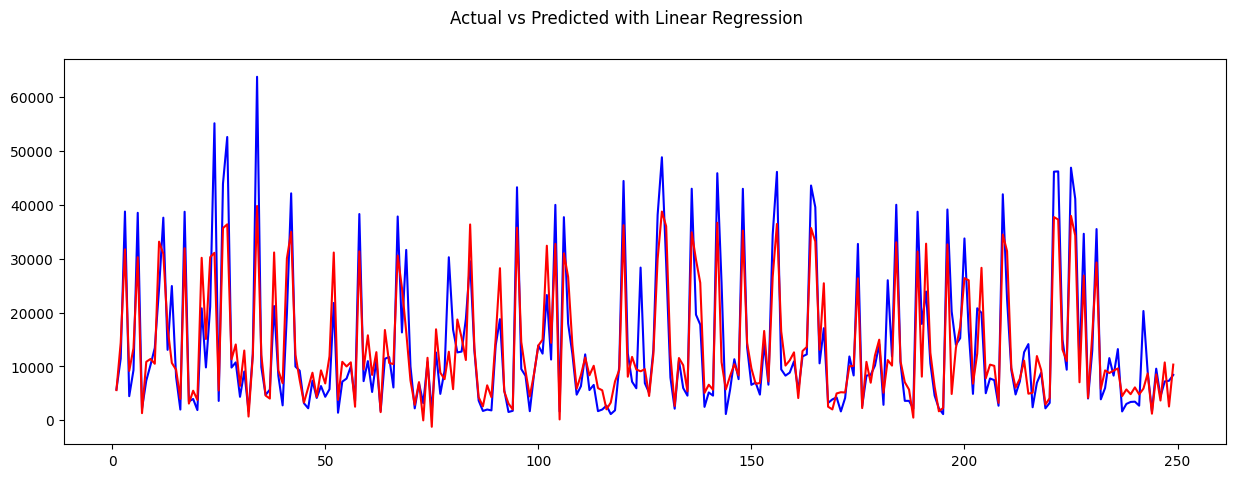

In [45]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred1[1:250],color="red")
fig.suptitle("Actual vs Predicted with Linear Regression")

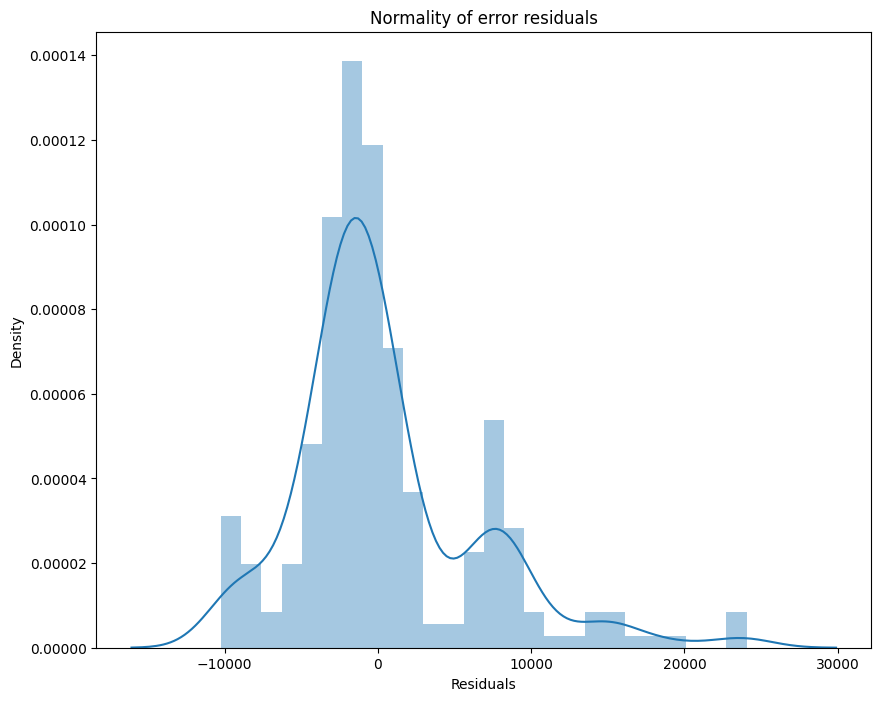

In [46]:
# Distribution of errors

plt.figure(figsize = (10,8))
p = sns.distplot(df_1['Variance'],kde=True)
p = plt.title('Normality of error residuals')
plt.xlabel("Residuals")
plt.show()

# 2. Using Support Vector Regressor



In [47]:
# Model SVM
from sklearn.svm import SVR

In [48]:
svm = SVR()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)

In [49]:
# Evaluating the Algorithm
score2 = r2_score(y_test, y_pred2)
print(score2)

-0.13444607209628168


In [50]:
# Evaluating metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 9249.561476303981
MSE: 208461345.07529798
RMSE: 14438.190505575758


In [51]:
df_2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred2,'Variance':y_test-y_pred2})
df_2.head()

,Actual,Predicted,Variance
900,8688.85885,9285.080337,-596.221487
1064,5708.86700,9160.062788,-3451.195788
1256,11436.73815,9304.088514,2132.649636
298,38746.35510,9173.356317,29572.998783
237,4463.20510,9176.209922,-4713.004822


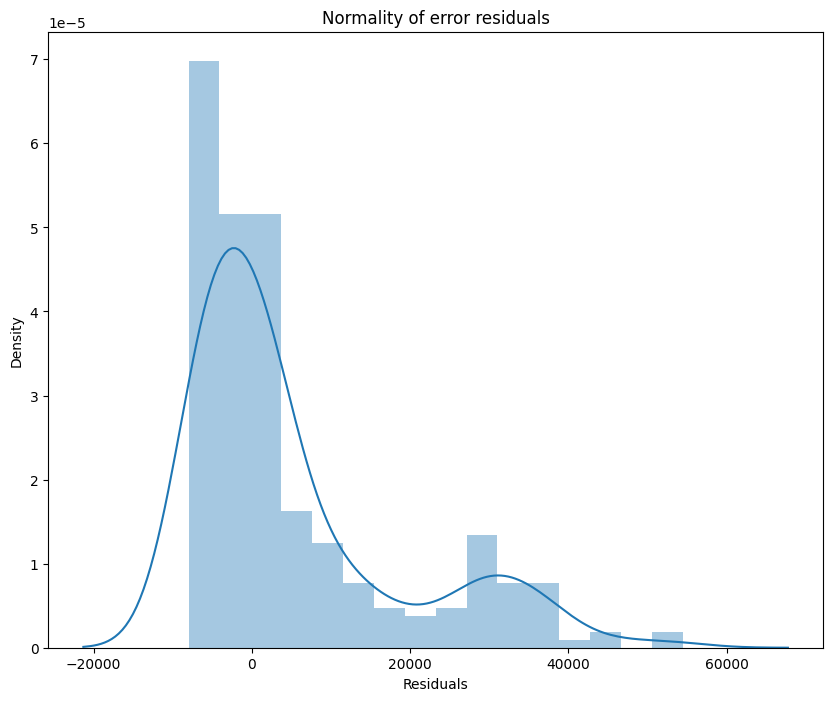

In [52]:
# Distribution of errors

plt.figure(figsize = (10,8))
p = sns.distplot(df_2['Variance'],kde=True)
p = plt.title('Normality of error residuals')
plt.xlabel("Residuals")
plt.show()

Text(0.5, 0.98, 'Actual vs Predicted with SVM')

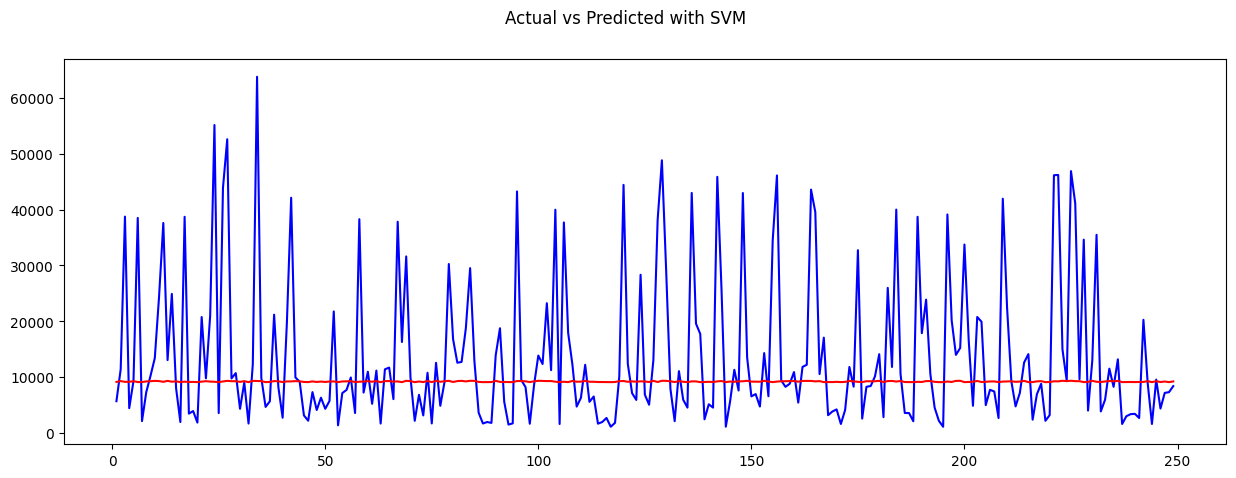

In [53]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred2[1:250],color="red")
fig.suptitle("Actual vs Predicted with SVM")

In [54]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [55]:
print(model.feature_importances_)

[0.13017757 0.00982717 0.19343884 0.02389611 0.62056564 0.02209467]


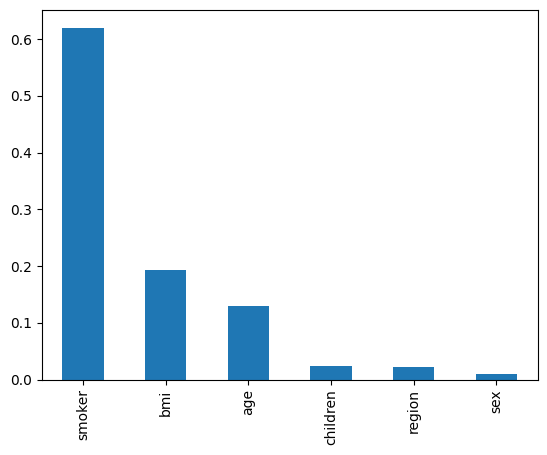

In [56]:
## Barplot of Feature Importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

# 3. Using Random Forest Regressor

In [57]:
# Model Random Forest
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf = RandomForestRegressor()

In [59]:
## Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

In [62]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

In [63]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

In [64]:
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

In [65]:
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [66]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [67]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10,
                              cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [68]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [70]:
rf_random.best_score_

-23807270.727573827

In [71]:
y_pred3 = rf_random.predict(X_test)

In [72]:
# Evaluating the Algorithm
score3 = r2_score(y_test, y_pred3)
print(score3)

0.8763970835726433


In [73]:
# Evaluating metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 2790.0160094620433
MSE: 22712785.426692
RMSE: 4765.793263108671


In [74]:
df_3 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred3,'Variance':y_test-y_pred3})
df_3.head()

,Actual,Predicted,Variance
900,8688.85885,9878.553004,-1189.694154
1064,5708.86700,7613.062272,-1904.195272
1256,11436.73815,12896.600258,-1459.862108
298,38746.35510,36758.035043,1988.320057
237,4463.20510,6037.447389,-1574.242289


Text(0.5, 0.98, 'Actual vs Predicted with Random Forest')

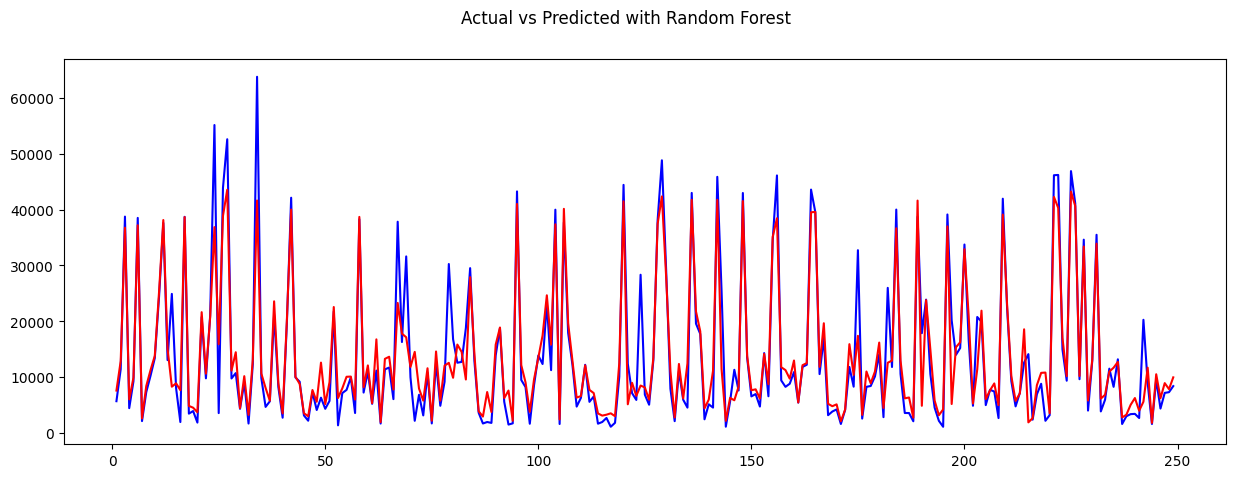

In [75]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred3[1:250],color="red")
fig.suptitle("Actual vs Predicted with Random Forest")

<Axes: xlabel='charges', ylabel='Density'>

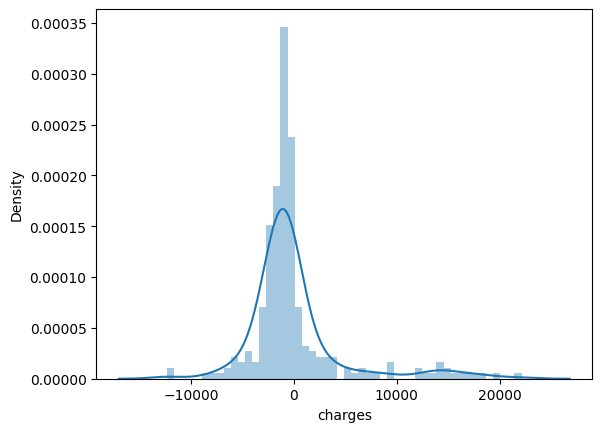

In [76]:
sns.distplot(y_test-y_pred3)

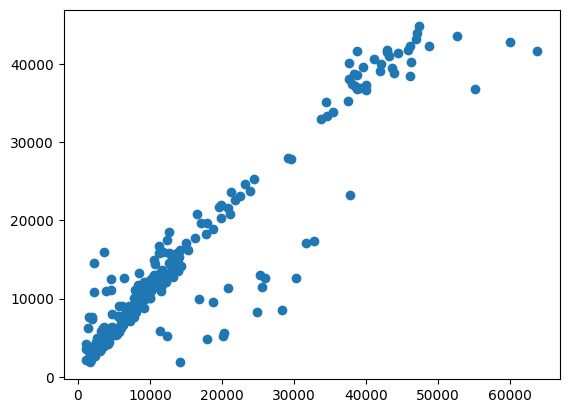

In [77]:
plt.scatter(y_test,y_pred3)

# 4. Using Gradient Boosting

In [78]:
# Model Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
gbr = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [80]:
gbr.fit(X_train,y_train)
y_pred4 = gbr.predict(X_test)

In [81]:
score4 = r2_score(y_test, y_pred4)
print(score4)

0.8883431212566514


In [82]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [83]:
# Create the param grid
param_grid={'n_estimators':[100,150,200,250],
             'learning_rate':[.001,0.01,.1,0.15,0.05],
             'max_depth':[1,2,4],
             'subsample':[.5,.75,1],
             'random_state':[1]}

In [84]:
gbr_model = GridSearchCV(gbr, param_grid, scoring='r2',cv = 5, verbose = 2, n_jobs = 1)

In [85]:
gbr_model.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.75; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.75; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.75; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=1, n_e

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=1.0, max_depth=2,
                                                 n_estimators=3),
             n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.05],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [100, 150, 200, 250],
                         'random_state': [1], 'subsample': [0.5, 0.75, 1]},
             scoring='r2', verbose=2)

In [86]:
gbr_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 150,
 'random_state': 1,
 'subsample': 0.75}

In [87]:
y_pred_gb = gbr_model.predict(X_test)

In [88]:
# Evaluating the Algorithm
score_gb = r2_score(y_test, y_pred_gb)
print(score_gb)

0.9015108475292608


In [89]:
# Evaluating metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)))

MAE: 2507.1092474860975
MSE: 18097979.00876675
RMSE: 4254.1719533614005


In [90]:
df_4 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_gb,'Variance':y_test-y_pred_gb})
df_4.head()

,Actual,Predicted,Variance
900,8688.85885,9973.909444,-1285.050594
1064,5708.86700,6826.733209,-1117.866209
1256,11436.73815,13227.638432,-1790.900282
298,38746.35510,38320.265649,426.089451
237,4463.20510,6623.324400,-2160.119300


Text(0.5, 0.98, 'Actual vs Predicted with Gradient Boosting')

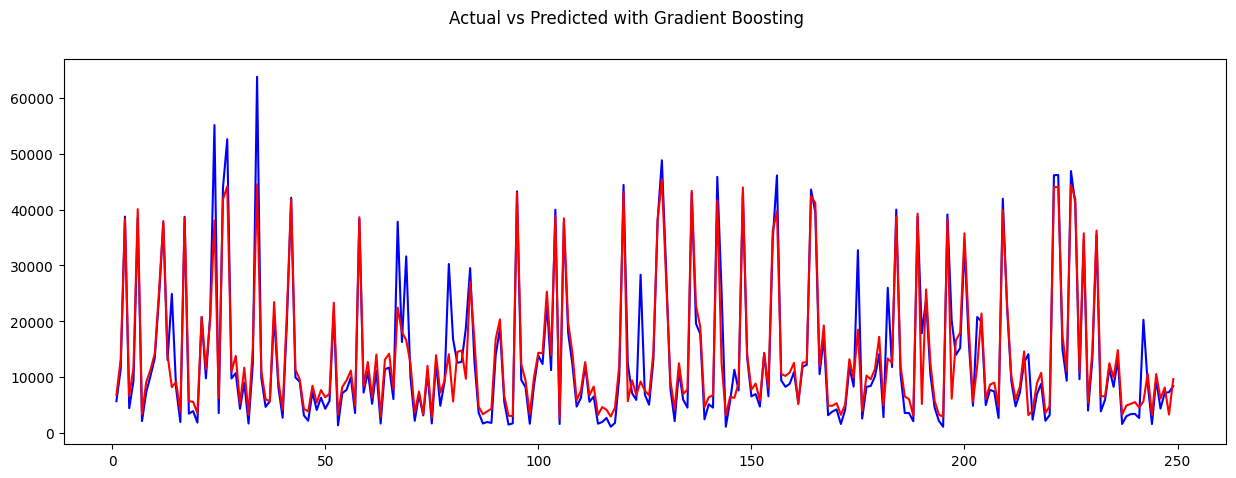

In [91]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred_gb[1:250],color="red")
fig.suptitle("Actual vs Predicted with Gradient Boosting")

<Axes: xlabel='charges', ylabel='Density'>

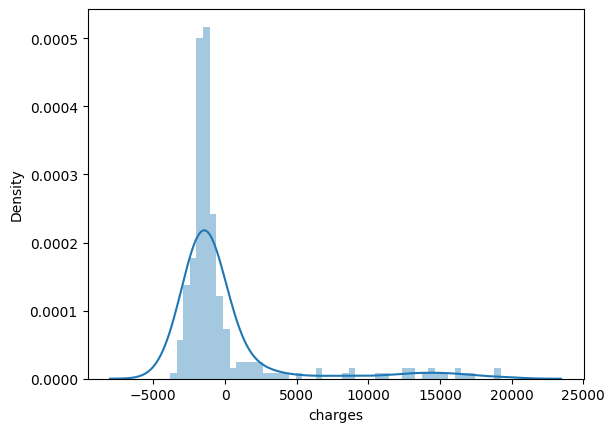

In [92]:
sns.distplot(y_test-y_pred_gb)

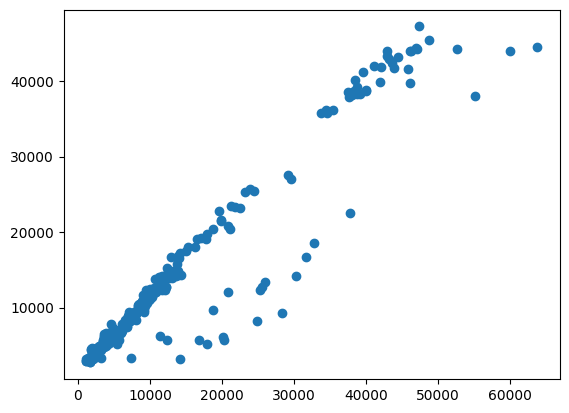

In [93]:
plt.scatter(y_test,y_pred_gb)

Comparing Predicted Values for All Models

In [94]:
df_5 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gb':y_pred_gb})
df_5.head()

,Actual,Lr,svm,rf,gb
900,8688.85885,8080.450186,9285.080337,9878.553004,9973.909444
1064,5708.86700,5592.871120,9160.062788,7613.062272,6826.733209
1256,11436.73815,14378.298655,9304.088514,12896.600258,13227.638432
298,38746.35510,31731.819541,9173.356317,36758.035043,38320.265649
237,4463.20510,9158.356944,9176.209922,6037.447389,6623.324400


In [95]:
print(score1,score2,score3,score_gb)

0.8068466322629113 -0.13444607209628168 0.8763970835726433 0.9015108475292608


Compare Performance Visually

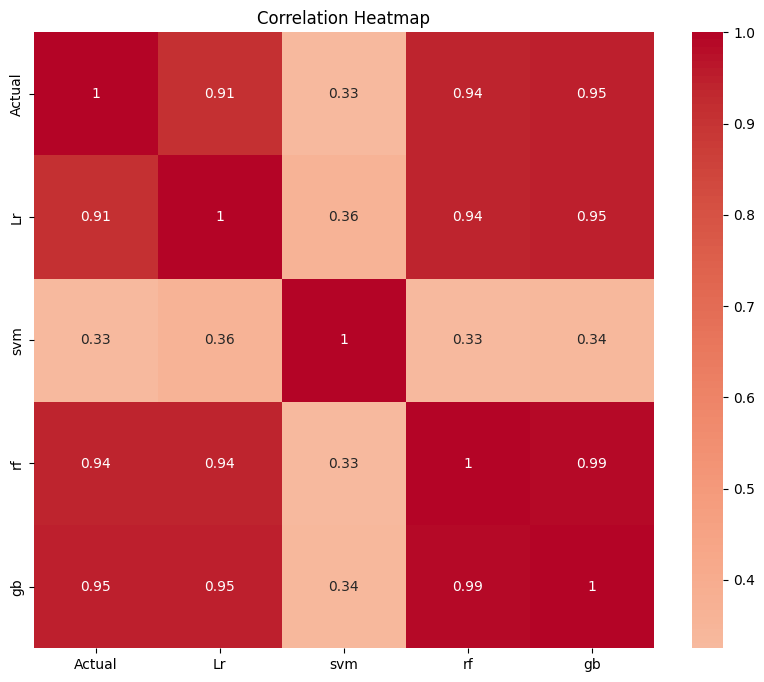

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_5.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

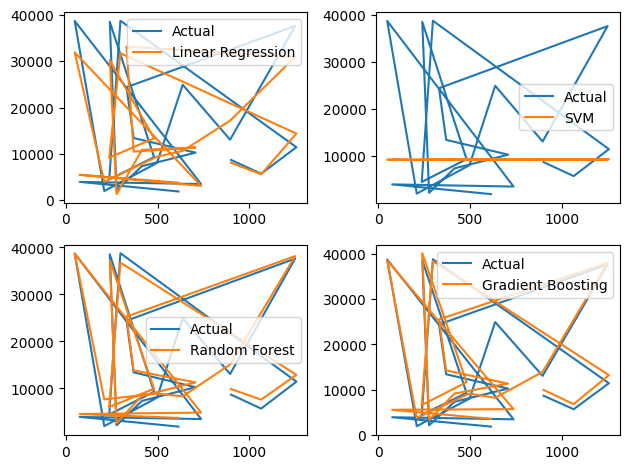

In [106]:
plt.subplot(221)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['Lr'].iloc[0:21],label='Linear Regression')
plt.legend()

plt.subplot(222)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['svm'].iloc[0:21],label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['rf'].iloc[0:21],label='Random Forest')
plt.legend()

plt.subplot(224)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['gb'].iloc[0:21],label='Gradient Boosting')

plt.tight_layout()

plt.legend()

In [97]:
# Evaluating the Algorithm
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred_gb)

print(s1,s2,s3,s4)

4182.353155288296 9249.561476303981 2790.0160094620433 2507.1092474860975


Predict with Gradient Boosting Model

In [98]:
# Predict Charges for New Customer

data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [99]:
new_pred = gbr.predict(df)
print("Medical Insurance cost for new : ",new_pred)

Medical Insurance cost for new :  [41266.62892497]


In [100]:
# Save Model Using joblib
import joblib

In [101]:
joblib.dump(gbr, 'model_joblib_test')

['model_joblib_test']

In [102]:
# Prediction Gradient Boosting
model = joblib.load('model_joblib_test')
model.predict([[40, 1, 40.3, 4, 1, 2]])

array([41266.62892497])